In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from collections import defaultdict


In [4]:
job_data=pd.read_csv("job_analysis.csv")

In [5]:
job_data

,title,link,published_date,is_hourly,hourly_low,hourly_high,budget,country
0,Experienced Media Buyer For Solar Pannel and R...,https://www.upwork.com/jobs/Experienced-Media-...,2024-02-17 09:09:54+00:00,False,NaN,NaN,500.0,NaN
1,Full Stack Developer,https://www.upwork.com/jobs/Full-Stack-Develop...,2024-02-17 09:09:17+00:00,False,NaN,NaN,1100.0,United States
2,SMMA Bubble App,https://www.upwork.com/jobs/SMMA-Bubble-App_%7...,2024-02-17 09:08:46+00:00,True,10.0,30.0,NaN,United States
3,Talent Hunter Specialized in Marketing,https://www.upwork.com/jobs/Talent-Hunter-Spec...,2024-02-17 09:08:08+00:00,True,NaN,NaN,NaN,United States
4,Data Engineer,https://www.upwork.com/jobs/Data-Engineer_%7E0...,2024-02-17 09:07:42+00:00,False,NaN,NaN,650.0,India
...,...,...,...,...,...,...,...,...
244823,Need Facebook advertising experts to launch pr...,https://www.upwork.com/jobs/Need-Facebook-adve...,2024-03-24 13:28:38+00:00,True,20.0,100.0,NaN,Zambia
244824,Digital/Telemarketing/Sales/OutSide Sales,https://www.upwork.com/jobs/Digital-Telemarket...,2024-03-24 13:40:52+00:00,False,NaN,NaN,100.0,Sri Lanka
244825,WordPress Template Edits,https://www.upwork.com/jobs/WordPress-Template...,2024-03-24 13:37:50+00:00,True,5.0,30.0,NaN,United States
244826,ELEMENTOR PRO For quick fix (Wordpress),https://www.upwork.com/jobs/ELEMENTOR-PRO-For-...,2024-03-24 13:52:15+00:00,False,NaN,NaN,15.0,France


In [6]:
job_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244828 entries, 0 to 244827
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   title           244827 non-null  object 
 1   link            244827 non-null  object 
 2   published_date  244828 non-null  object 
 3   is_hourly       244828 non-null  bool   
 4   hourly_low      102422 non-null  float64
 5   hourly_high     98775 non-null   float64
 6   budget          103891 non-null  float64
 7   country         239751 non-null  object 
dtypes: bool(1), float64(3), object(4)
memory usage: 13.3+ MB


In [7]:
job_data.isnull().sum()

title                  1
link                   1
published_date         0
is_hourly              0
hourly_low        142406
hourly_high       146053
budget            140937
country             5077
dtype: int64

In [8]:
job_data = job_data.dropna(subset=['title', 'link'])

In [9]:
job_data.isnull().sum()

title                  0
link                   0
published_date         0
is_hourly              0
hourly_low        142405
hourly_high       146052
budget            140936
country             5076
dtype: int64

In [10]:
hourly_low_median = job_data['hourly_low'].median()
hourly_high_median = job_data['hourly_high'].median()

# Fill the missing values with the respective medians
job_data['hourly_low'].fillna(hourly_low_median, inplace=True)
job_data['hourly_high'].fillna(hourly_high_median, inplace=True)

/var/folders/p0/drbt9nr13s16r1m43px056hc0000gn/T/ipykernel_9356/3359405391.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  job_data['hourly_low'].fillna(hourly_low_median, inplace=True)
/var/folders/p0/drbt9nr13s16r1m43px056hc0000gn/T/ipykernel_9356/3359405391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  job_data['hourly_high'].fillna(hourly_high_median, inplace=True)


In [11]:
median_budget = job_data['budget'].median()
job_data['budget'].fillna(median_budget, inplace=True)

/var/folders/p0/drbt9nr13s16r1m43px056hc0000gn/T/ipykernel_9356/390661608.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  job_data['budget'].fillna(median_budget, inplace=True)


In [12]:
job_data['country'].fillna('Other', inplace=True)

/var/folders/p0/drbt9nr13s16r1m43px056hc0000gn/T/ipykernel_9356/1612707280.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  job_data['country'].fillna('Other', inplace=True)


In [13]:
print(job_data.isnull().sum())

title             0
link              0
published_date    0
is_hourly         0
hourly_low        0
hourly_high       0
budget            0
country           0
dtype: int64


In [14]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [15]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /Users/jagsanad/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jagsanad/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/jagsanad/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/jagsanad/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [16]:
lemmatizer = WordNetLemmatizer()

# Function to lemmatize keywords
def lemmatize_keyword(keyword):
    return lemmatizer.lemmatize(keyword)

# Extract and lemmatize keywords from job titles
def extract_keywords(title):
    # Convert title to lowercase and remove punctuation
    title = re.sub(r'[^\w\s]', '', title.lower())
    # Tokenize the title
    tokens = word_tokenize(title)
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    keywords = [lemmatize_keyword(token) for token in tokens if token not in stop_words]
    return keywords

In [17]:
job_data['keywords'] = job_data['title'].apply(extract_keywords)

# Flatten the list of keywords
keywords_flat = [keyword for sublist in job_data['keywords'] for keyword in sublist]

# Count the frequency of each keyword
keyword_counts = Counter(keywords_flat)


/var/folders/p0/drbt9nr13s16r1m43px056hc0000gn/T/ipykernel_9356/2702865317.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  job_data['keywords'] = job_data['title'].apply(extract_keywords)


In [18]:
top_10_keywords = keyword_counts.most_common(10)
top_10_keywords_df = pd.DataFrame(top_10_keywords, columns=['Keyword', 'Frequency'])
top_10_keywords

[('website', 17570),
 ('needed', 17569),
 ('video', 16188),
 ('developer', 15996),
 ('expert', 15251),
 ('design', 13512),
 ('designer', 12839),
 ('need', 10604),
 ('amp', 9275),
 ('specialist', 9047)]

In [19]:
combined_keywords = {
    'website': keyword_counts['website'],
    'need': keyword_counts['needed'] + keyword_counts['need'],
    'video': keyword_counts['video'],
    'developer': keyword_counts['developer'],
    'expert': keyword_counts['expert'],
    'design': keyword_counts['design'] + keyword_counts['designer'],
    'amp': keyword_counts['amp'],
    'specialist': keyword_counts['specialist']
}

# Sort combined keywords by frequency
sorted_combined_keywords = sorted(combined_keywords.items(), key=lambda item: item[1], reverse=True)


In [20]:
top_10_combined_keywords = sorted_combined_keywords[:10]
top_10_combined_keywords_df = pd.DataFrame(top_10_combined_keywords, columns=['Keyword', 'Frequency'])
top_10_combined_keywords

[('need', 28173),
 ('design', 26351),
 ('website', 17570),
 ('video', 16188),
 ('developer', 15996),
 ('expert', 15251),
 ('amp', 9275),
 ('specialist', 9047)]

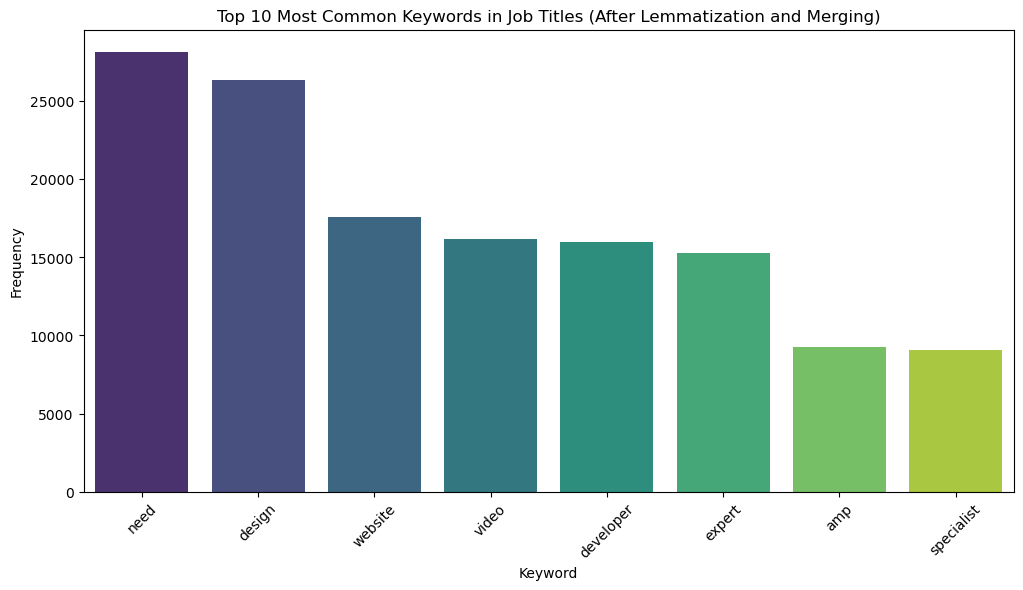

In [21]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_combined_keywords_df, x='Keyword', y='Frequency', palette='viridis')
plt.title('Top 10 Most Common Keywords in Job Titles (After Lemmatization and Merging)')
plt.xlabel('Keyword')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [22]:
keyword_salary_data = defaultdict(lambda: {'salary_sum': 0, 'count': 0})

# Calculate total salary and count for each keyword
for index, row in job_data.iterrows():
    budget = row['budget']
    for keyword in row['keywords']:
        keyword_salary_data[keyword]['salary_sum'] += budget
        keyword_salary_data[keyword]['count'] += 1

# Calculate average salary for each keyword
keyword_avg_salary = {k: v['salary_sum'] / v['count'] for k, v in keyword_salary_data.items()}

In [23]:
keyword_salary_df = pd.DataFrame(keyword_avg_salary.items(), columns=['Keyword', 'Average_Salary'])
keyword_salary_df = keyword_salary_df.sort_values(by='Average_Salary', ascending=False)
keyword_salary_df.head(10)

,Keyword,Average_Salary
47272,1mmonth,1000000.000000
44520,martkeplace,1000000.000000
38834,token2022,999999.000000
45985,representant,400000.000000
15775,responsivo,350050.000000
20251,independence,334533.333333
32363,webseries,300150.000000
2280,telco,166314.166667
38833,140k,140000.000000
20675,practioner,125050.000000


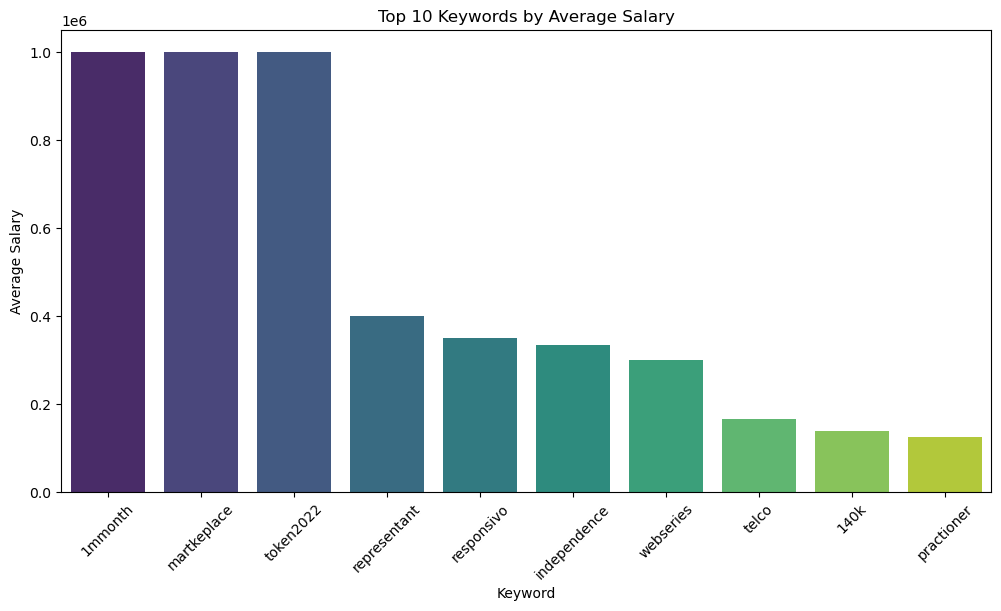

In [24]:
plt.figure(figsize=(12, 6))
sns.barplot(data=keyword_salary_df.head(10), x='Keyword', y='Average_Salary', palette='viridis')
plt.title('Top 10 Keywords by Average Salary')
plt.xlabel('Keyword')
plt.ylabel('Average Salary')
plt.xticks(rotation=45)
plt.show()

In [25]:
job_data.head()

,title,link,published_date,is_hourly,hourly_low,hourly_high,budget,country,keywords
0,Experienced Media Buyer For Solar Pannel and R...,https://www.upwork.com/jobs/Experienced-Media-...,2024-02-17 09:09:54+00:00,False,15.0,30.0,500.0,Other,"[experienced, medium, buyer, solar, pannel, ro..."
1,Full Stack Developer,https://www.upwork.com/jobs/Full-Stack-Develop...,2024-02-17 09:09:17+00:00,False,15.0,30.0,1100.0,United States,"[full, stack, developer]"
2,SMMA Bubble App,https://www.upwork.com/jobs/SMMA-Bubble-App_%7...,2024-02-17 09:08:46+00:00,True,10.0,30.0,100.0,United States,"[smma, bubble, app]"
3,Talent Hunter Specialized in Marketing,https://www.upwork.com/jobs/Talent-Hunter-Spec...,2024-02-17 09:08:08+00:00,True,15.0,30.0,100.0,United States,"[talent, hunter, specialized, marketing]"
4,Data Engineer,https://www.upwork.com/jobs/Data-Engineer_%7E0...,2024-02-17 09:07:42+00:00,False,15.0,30.0,650.0,India,"[data, engineer]"


In [26]:
keyword_salary_df

,Keyword,Average_Salary
47272,1mmonth,1000000.0
44520,martkeplace,1000000.0
38834,token2022,999999.0
45985,representant,400000.0
15775,responsivo,350050.0
...,...,...
33519,pdp11,5.0
33518,xinu,5.0
5066,30secs,5.0
46072,spacemail,5.0


In [27]:
import warnings
warnings.filterwarnings('ignore')

In [28]:
correlation_results = {}

# Iterate over each keyword
for keyword in keyword_avg_salary.keys():
    # Calculate the presence of the keyword in each job title
    keyword_salary_df[keyword] = keyword_salary_df['Keyword'].apply(lambda x: 1 if keyword in x else 0)
    # Calculate correlation between keyword presence and salary
    correlation = np.corrcoef(keyword_salary_df[keyword], keyword_salary_df['Average_Salary'])[0, 1]
    correlation_results[keyword] = correlation

# Convert correlation results dictionary to DataFrame
correlation_df = pd.DataFrame(list(correlation_results.items()), columns=['Keyword', 'Correlation'])

In [29]:
correlation_df

,Keyword,Correlation
0,experienced,-0.000476
1,medium,-0.000224
2,buyer,-0.000824
3,solar,-0.000472
4,pannel,-0.000136
...,...,...
48408,arbitragemev,-0.000174
48409,autopopulating,-0.000174
48410,zapierairtable,-0.000245
48411,overthetopcomic,-0.000199


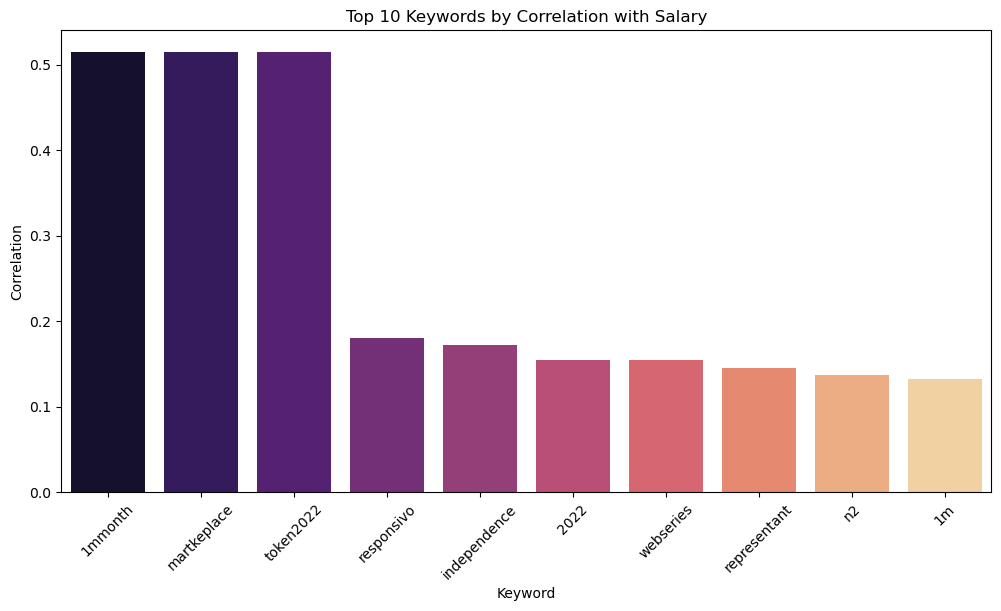

In [30]:
plt.figure(figsize=(12, 6))
sns.barplot(data=correlation_df.sort_values(by='Correlation', ascending=False).head(10), x='Keyword', y='Correlation', palette='magma')
plt.title('Top 10 Keywords by Correlation with Salary')
plt.xlabel('Keyword')
plt.ylabel('Correlation')
plt.xticks(rotation=45)
plt.show()

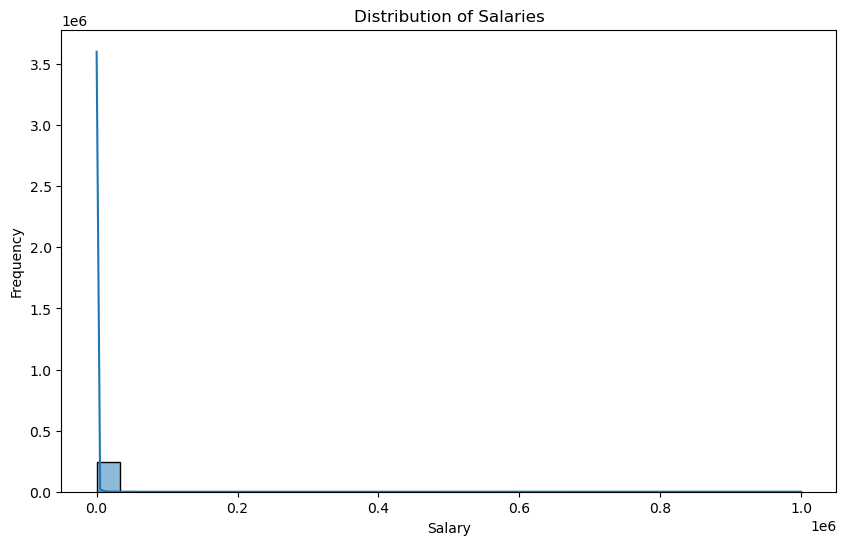

In [31]:
plt.figure(figsize=(10, 6))
sns.histplot(job_data['budget'], bins=30, kde=True)
plt.title('Distribution of Salaries')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

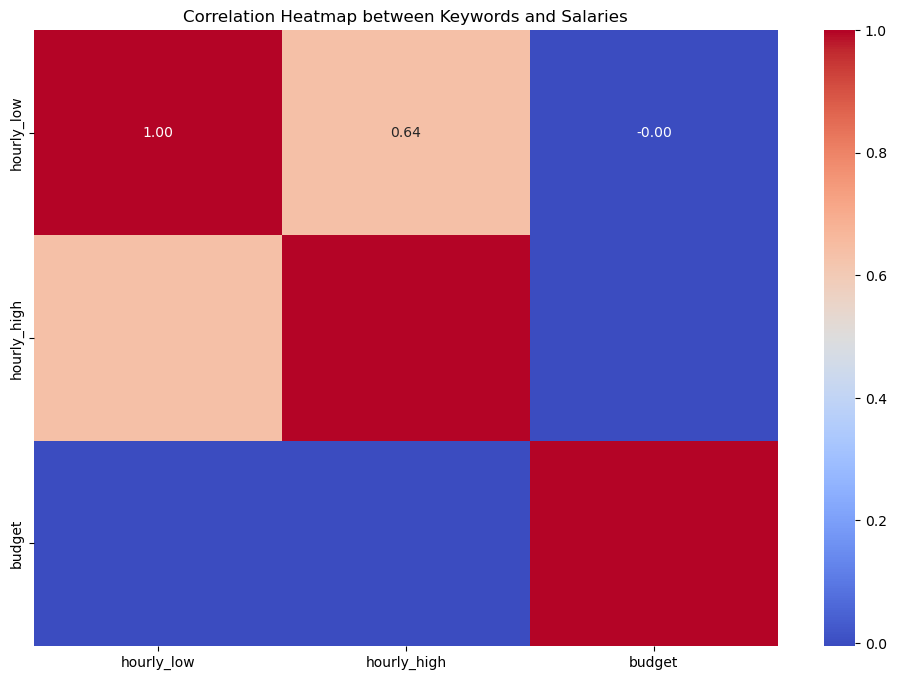

In [32]:
numeric_data = job_data.select_dtypes(include=[float, int])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap between Keywords and Salaries')
plt.show()

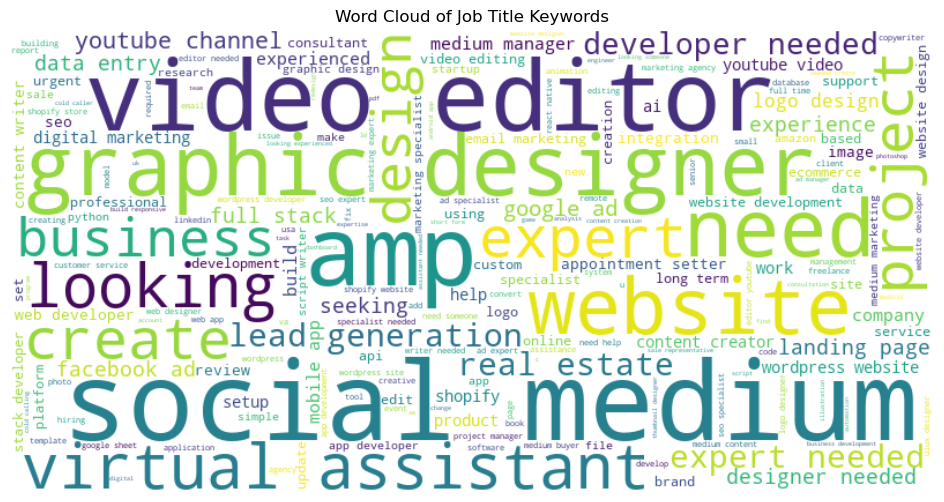

In [33]:
from wordcloud import WordCloud

# Word cloud of job title keywords
keywords_text = ' '.join(job_data['keywords'].explode().dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(keywords_text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Job Title Keywords')
plt.axis('off')
plt.show()